# Capstone Project - The Battle of Neighborhoods

Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:

    In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
    In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.
Review criteria

This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade. The project will be completed over the course of 2 weeks.  Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade.

__For this week, you will required to submit the following:__

    A description of the problem and a discussion of the background. (15 marks)
    A description of the data and how it will be used to solve the problem. (15 marks)

__For the second week, the final deliverables of the project will be:__

1. A link to your Notebook on your Github repository, showing your code. (15 marks)  _&rarr; Jupyter Notebook_

2. A full report consisting of all of the following components (15 marks):  _&rarr; Text as .pdf_

    __Introduction__ where you discuss the business problem and who would be interested in this project.
    
    __Data__ where you describe the data that will be used to solve the problem and the source of the data.
    
    __Methodology section__ which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
    
    __Results section__ where you discuss the results.
    
    __Discussion section__ where you discuss any observations you noted and any recommendations you can make based on the results.
    
    __Conclusion section__ where you conclude the report.

3. Your choice of a presentation or blogpost. (10 marks)  _&rarr; PowerPoint as .pdf_

***
# WEEK 4

Project Title: "Give your project a descriptive title

Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This submission will eventually become your __Introduction/Business Problem__ section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

URL

Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

This submission will eventually become your __Data__ section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it.

URL
***

***
# WEEK 5

In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

    A full report consisting of all of the following components (15 marks):

    Introduction where you discuss the business problem and who would be interested in this project.
    Data where you describe the data that will be used to solve the problem and the source of the data.
    Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
    Results section where you discuss the results.
    Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
    Conclusion section where you conclude the report.

2. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

3. Your choice of a presentation or blogpost. (10 marks)

Here are examples of previous outstanding submissions that should give you an idea of what your report would look like, what your notebook would look like in terms of clean, clear, and well-commented code, and what your presentation would look like or your blogpost would look like:

    Report: Report Template
    Notebook: Notebook Template
    Presentation: Presentation Template
    Blogpost: Blogpost template


Project Title

Please submit a link to your Notebook.
URL

Please submit a link to your report.
URL

Please submit a link to either your presentation or blogpost.
URL



***

In [ ]:
# Sample code from Week 3 >>> @@@@@@@@@@@@@@@@@@@@ REMOVE LATER!!!
import pandas as pd
import numpy as np
import requests

from bs4 import BeautifulSoup


source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

soup = BeautifulSoup(source, 'html5lib')

postal_codes_dict = {} # initialize an empty dictionary to save the data in
for table_cell in soup.find_all('td'):
    try:
        postal_code = table_cell.p.b.text # get the postal code
        postal_code_investigate = table_cell.span.text
        neighborhoods_data = table_cell.span.text # get the rest of the data in the cell
        borough = neighborhoods_data.split('(')[0] # get the borough in the cell
        
        # if the cell is not assigned then ignore it
        if neighborhoods_data == 'Not assigned':
            neighborhoods = []
        # else process the data and add it to the dictionary
        else:
            postal_codes_dict[postal_code] = {}
            
            try:
                neighborhoods = neighborhoods_data.split('(')[1]
            
                # remove parantheses from neighborhoods string
                neighborhoods = neighborhoods.replace('(', ' ')
                neighborhoods = neighborhoods.replace(')', ' ')

                neighborhoods_names = neighborhoods.split('/')
                neighborhoods_clean = ', '.join([name.strip() for name in neighborhoods_names])
            except:
                borough = borough.strip('\n')
                neighborhoods_clean = borough
 
            # add borough and neighborhood to dictionary
            postal_codes_dict[postal_code]['borough'] = borough
            postal_codes_dict[postal_code]['neighborhoods'] = neighborhoods_clean
    except:
        pass
    
# create an empty dataframe
columns = ['PostalCode', 'Borough', 'Neighborhood']
toronto_data = pd.DataFrame(columns=columns)
toronto_data

# populate dataframe with data from dictionary
for ind, postal_code in enumerate(postal_codes_dict):
    borough = postal_codes_dict[postal_code]['borough']
    neighborhood = postal_codes_dict[postal_code]['neighborhoods']
    toronto_data = toronto_data.append({"PostalCode": postal_code, 
                                        "Borough": borough, 
                                        "Neighborhood": neighborhood},
                                        ignore_index=True)

# print number of rows of dataframe
toronto_data.shape[0]

# Sample code from Week 3 >>> @@@@@@@@@@@@@@@@@@@@ REMOVE LATER!!!
...so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:

In [ ]:
# Sample code from Week 3 >>> @@@@@@@@@@@@@@@@@@@@ REMOVE LATER!!!
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

Nombre 	Rosario

Código Postal 	S2000, S2001, S2002, S2003, S2004, S2005, S2006, S2007, S2008, S2009, S2010, S2011, S2012, S2013

https://www.azcodigopostal.com/argentina/pplace-rosario-82084/

https://nuestraciudad.info/portal/Rosario.SF/Barrios

https://en.wikipedia.org/wiki/Rosario,_Santa_Fe

https://en.wikipedia.org/wiki/Districts_of_Rosario

https://en.wikipedia.org/wiki/Postal_codes_in_Argentina

# MY WORK STARTS HERE:

# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references) >>> add

### &rarr; My goal is to find the neighborhood that's most attractive to turists / young people / students, for potential real state investor who wish to buy apartments and rent them to:
- Turists (through a service like AirB&B)
- Young single professionals
- College students

In [1]:
import requests
import os
import pandas as pd

import numpy as np
import json

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

# from sklearn.cluster import KMeans ######### imported later

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
# create dataframe with coordinates data for Rosario's neighborhoods
neighborhoods = pd.read_csv('Barrios_de_Rosario.csv')
neighborhoods.head()

,Neighborhood,District,Latitude,Longitude
0,14 de Octubre,Distrito Sudoeste,-32.996944,-60.663056
1,17 de Agosto,Distrito Sudoeste,-33.011944,-60.660000
2,Abasto,Distrito Centro,-32.961667,-60.646944
3,Alberdi,Distrito Norte,-32.897222,-60.698333
4,Alberto Olmedo,Distrito Centro,-32.933611,-60.658056


In [3]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [4]:
address = 'Rosario, Santa Fe, Argentina'

geolocator = Nominatim(user_agent="rosario_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of the city of Rosario are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of the city of Rosario are -32.9595004, -60.6615415.


In [5]:
print('The dataframe has {} districts and {} neighborhoods.'.format(
        len(neighborhoods['District'].unique()),
        len(neighborhoods['Neighborhood'].unique())
    )
)

The dataframe has 14 districts and 46 neighborhoods.


The city of Rosario has only [6 districts](https://en.wikipedia.org/wiki/Districts_of_Rosario). In the 1990's the city's government decided to create the districts for administrative reasons, and these new divisions do not follow the limits of the original "barrios" (neighborhoods).

In [6]:
# count how many neighborhoods have been assigned to more than one district
count = 0
for i in range(len(neighborhoods)):
    if ',' in neighborhoods.loc[i, 'District']:
        count += 1
print('Number of neighborhoods assigned to more than one district: {}'.format(count))

Number of neighborhoods assigned to more than one district: 12


In order to create a map showing the different districts, for those neighborhoods that have been assigned to more than one district I will keep only the name of the first district they belong to in a new column named 'Districts':

In [7]:
for i in range(len(neighborhoods)):
    if ',' in neighborhoods.loc[i, 'District']:
        neighborhoods.loc[i, 'Districts'] = neighborhoods.loc[i, 'District'].split(',')[0]
    else:
        neighborhoods.loc[i, 'Districts'] = neighborhoods.loc[i, 'District']

neighborhoods

,Neighborhood,District,Latitude,Longitude,Districts
0,14 de Octubre,Distrito Sudoeste,-32.996944,-60.663056,Distrito Sudoeste
1,17 de Agosto,Distrito Sudoeste,-33.011944,-60.660000,Distrito Sudoeste
2,Abasto,Distrito Centro,-32.961667,-60.646944,Distrito Centro
3,Alberdi,Distrito Norte,-32.897222,-60.698333,Distrito Norte
4,Alberto Olmedo,Distrito Centro,-32.933611,-60.658056,Distrito Centro
5,Alvear,Distrito Sudoeste,-32.986944,-60.677778,Distrito Sudoeste
6,Antártida Argentina,Distrito Noroeste,-32.936944,-60.763056,Distrito Noroeste
7,Azcuénaga,"Distrito Noroeste, Distrito Oeste",-32.942500,-60.698333,Distrito Noroeste
8,Belgrano,Distrito Noroeste,-32.940833,-60.713333,Distrito Noroeste
9,Bella Vista,"Distrito Oeste, Distrito Sudoeste",-32.966667,-60.680833,Distrito Oeste


In [8]:
# I will drop the 'District' column since I won't need it anymore
neighborhoods.drop(['District'], axis=1, inplace=True)
neighborhoods

,Neighborhood,Latitude,Longitude,Districts
0,14 de Octubre,-32.996944,-60.663056,Distrito Sudoeste
1,17 de Agosto,-33.011944,-60.660000,Distrito Sudoeste
2,Abasto,-32.961667,-60.646944,Distrito Centro
3,Alberdi,-32.897222,-60.698333,Distrito Norte
4,Alberto Olmedo,-32.933611,-60.658056,Distrito Centro
5,Alvear,-32.986944,-60.677778,Distrito Sudoeste
6,Antártida Argentina,-32.936944,-60.763056,Distrito Noroeste
7,Azcuénaga,-32.942500,-60.698333,Distrito Noroeste
8,Belgrano,-32.940833,-60.713333,Distrito Noroeste
9,Bella Vista,-32.966667,-60.680833,Distrito Oeste


In [9]:
neighborhoods['Districts'].unique() # REMOVE LATER @@@@@@@@@@@@@@@@@@@@@@@@

array(['Distrito Sudoeste', 'Distrito Centro', 'Distrito Norte',
       'Distrito Noroeste', 'Distrito Oeste', 'Distrito Sur'],
      dtype=object)

In [10]:
### create map of Rosario's Districts

# Assign colors to the different boroughs in a new column named 'MarkerColor'
districts = list(neighborhoods['Districts'])

marker_color = []

for district in districts:
    if district == 'Distrito Centro':
        marker_color.append('red')
    elif district == 'Distrito Sudoeste':
        marker_color.append('blue')
    elif district == 'Distrito Noroeste':
        marker_color.append('orange')
    elif district == 'Distrito Norte':
        marker_color.append('green')
    elif district == 'Distrito Oeste':
        marker_color.append('purple')
    elif district == 'Distrito Sur':
        marker_color.append('lightgreen')  


neighborhoods['MarkerColor'] = marker_color
neighborhoods

,Neighborhood,Latitude,Longitude,Districts,MarkerColor
0,14 de Octubre,-32.996944,-60.663056,Distrito Sudoeste,blue
1,17 de Agosto,-33.011944,-60.660000,Distrito Sudoeste,blue
2,Abasto,-32.961667,-60.646944,Distrito Centro,red
3,Alberdi,-32.897222,-60.698333,Distrito Norte,green
4,Alberto Olmedo,-32.933611,-60.658056,Distrito Centro,red
5,Alvear,-32.986944,-60.677778,Distrito Sudoeste,blue
6,Antártida Argentina,-32.936944,-60.763056,Distrito Noroeste,orange
7,Azcuénaga,-32.942500,-60.698333,Distrito Noroeste,orange
8,Belgrano,-32.940833,-60.713333,Distrito Noroeste,orange
9,Bella Vista,-32.966667,-60.680833,Distrito Oeste,purple


In [11]:
# create map of Rosario using latitude and longitude values
map_rosario = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district, neighborhood, markercolor in zip(neighborhoods['Latitude'], 
                                                        neighborhoods['Longitude'], 
                                                        neighborhoods['Districts'], 
                                                        neighborhoods['Neighborhood'],
                                                        neighborhoods['MarkerColor']
                                                       ):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.7,
        parse_html=False).add_to(map_rosario)

map_rosario

# The map might not be visible on Github. Check out the README for the map.

### Explore Neighborhoods in Rosario

In [12]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'OC30BIT0T1C1DAJAXAUJGG1H3MQ1XOOZULL5ZWMARRVZFR0K' # your Foursquare ID
CLIENT_SECRET = 'NGO53AGQLJYHRMVAADNXU2QXJX1SLPK5M3HSMNTOWZQUMJZY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    """ names, latitudes, longitudes are columns from a dataframe. """
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,c
            lat,
            lng,
            radius,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude',
                  'Neighborhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    """ names, latitudes, longitudes are columns from a dataframe. """
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,c
            lat,
            lng,
            radius,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude',
                  'Neighborhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
# Run the above function on each neighborhood and create a new dataframe called rosario_venues.
rosario_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'])

14 de Octubre 
17 de Agosto
Abasto
Alberdi
Alberto Olmedo
Alvear
Antártida Argentina
Azcuénaga
Belgrano
Bella Vista
Celedonio Escalada
Cinco Esquinas
Domingo Faustino Sarmiento
Domingo Matheu
España y Hospitales
Esteban Echeverría
Fisherton
General Las Heras
Godoy
Jorge Cura
La Cerámica y Cuyo
La Guardia
Larrea y Empalme Graneros
Las Flores
Las Malvinas
Latinoamérica
Lisandro de la Torre
Ludueña
Luis Agote
Mercedes de San Martín
Nuestra Sra. de Lourdes
Parque Casado
Parque Field
Presidente Roque Saenz Peña
Remedios de Escalada de San Martín
República de la Sexta
Rosario Centro
Rucci
Saladillo Sur
San Martín
Tango
Tiro Suizo
Triángulo y Moderno
Victoria Walsh
Villa Manuelita
Villa Urquiza


In [15]:
print(rosario_venues.shape)
rosario_venues.head()

(207, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,14 de Octubre,-32.996944,-60.663056,MUDANZAS PRIMERA CLASE,-32.996867,-60.663561,Home Service
1,14 de Octubre,-32.996944,-60.663056,DESAGOTADORA TIRO SUIZO,-32.994291,-60.661555,Home Service
2,14 de Octubre,-32.996944,-60.663056,Roque Vicente Gioiosa SRL,-32.999975,-60.665331,Construction & Landscaping
3,14 de Octubre,-32.996944,-60.663056,27 SPA,-32.993370,-60.665086,Massage Studio
4,17 de Agosto,-33.011944,-60.660000,Le Gula,-33.010215,-60.662410,Restaurant


In [16]:
# Let's check how many venues were returned for each neighborhood
pd.set_option('display.max_rows', None)
rosario_venues_grouped = rosario_venues.groupby('Neighborhood').count().reset_index()
rosario_venues_grouped.sort_values('Venue', ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
30,Rosario Centro,38,38,38,38,38,38
20,Las Malvinas,23,23,23,23,23,23
4,Alberto Olmedo,18,18,18,18,18,18
11,Domingo Faustino Sarmiento,14,14,14,14,14,14
25,Nuestra Sra. de Lourdes,11,11,11,11,11,11
1,17 de Agosto,8,8,8,8,8,8
34,Tiro Suizo,7,7,7,7,7,7
15,Jorge Cura,6,6,6,6,6,6
21,Latinoamérica,5,5,5,5,5,5
28,Remedios de Escalada de San Martín,5,5,5,5,5,5


In [17]:
print(rosario_venues_grouped.shape)

(39, 7)


The dataframe grouped by 'Neighborhood' has 39/40 __???????__ rows, which means that Foursquare does not have information for all of Rosario's neighborhoods.

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Let's find out how many unique categories can be curated from all the returned venues:

In [18]:
print('There are {} uniques categories.'.format(len(rosario_venues['Venue Category'].unique())))

There are 83 uniques categories.


Let's take a look at where all these venues are located:

In [29]:
rosario_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,1,1,1,1,1,1
Argentinian Restaurant,8,8,8,8,8,8
Asian Restaurant,1,1,1,1,1,1
Athletics & Sports,2,2,2,2,2,2
Auto Workshop,1,1,1,1,1,1
BBQ Joint,2,2,2,2,2,2
Bakery,9,9,9,9,9,9
Bar,2,2,2,2,2,2
Basketball Stadium,1,1,1,1,1,1


In [26]:
# create map of Rosario using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue, venue_cat, in zip(rosario_venues['Venue Latitude'], 
                                             rosario_venues['Venue Longitude'],
                                             rosario_venues['Venue'],
                                             rosario_venues['Venue Category']
                                            ):
    label = '{}, {}'.format(venue, venue_cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='lightpurple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)

map_venues

# &rarr; My goal &rarr; to find the best neighborhoods and venues to visit in Rosario for travelers interested in gastronomic tourism
Rosario has a great gastronomic XXX with restaurant with different cuisines (Argentinian, Italian, Sushi, Spanish, Chinese...), breweries for those who enjoy good artisan beer, traditional coffee shops, bakeries with delicious pastries and some of the best ice cream shops in Argentina.

In [35]:
# how many venues within each category?
rosario_venues.groupby('Venue Category').count().sort_values('Venue', ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Ice Cream Shop,11,11,11,11,11,11
Bakery,9,9,9,9,9,9
Hotel,8,8,8,8,8,8
Restaurant,8,8,8,8,8,8
Argentinian Restaurant,8,8,8,8,8,8
Café,7,7,7,7,7,7
Pizza Place,7,7,7,7,7,7
Construction & Landscaping,7,7,7,7,7,7
Italian Restaurant,7,7,7,7,7,7


In [39]:
#### first: create subdf with food related venues only
# get a list all the categories
venues = list(rosario_venues.groupby('Venue Category').groups.keys())

83

The dataset contains many venues that belong to the same category, but are assigned to different ones because the category names are not uniform. For example, all venues under the following categories:

- 'Cafeteria'
- 'Café'
- 'Coffee Shop'
- 'Bar'
- 'Breakfast Spot'

could be reassigned to only one category, 'Coffee Shop'.

I will create a sublist with only food and drinks related categories.

_(Note: in Argentina, venues called 'Bars' open all day long, sell mostly coffee, serve breakfast, etc. They are what is usually named 'Coffee shop'. If the venue sells mostly alcoholic drinks, then it's a 'Cocktail Bar'.)_

In [40]:
# create sublist with food and drinks related categories
food_categories = ['Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bakery', 'Bar', 'Beer Store', 'Breakfast Spot', 'Brewery',
                   'Cafeteria', 'Café', 'Cocktail Bar', 'Coffee Shop', 'Dessert Shop', 'Diner', 'Fast Food Restaurant', 'Food & Drink Shop',
                   'Gastropub', 'Ice Cream Shop', 'Irish Pub', 'Italian Restaurant', 'Mexican Restaurant', 'Nightclub', 'Pizza Place',
                   'Pub', 'Restaurant', 'Sandwich Place', 'Seafood Restaurant', 'Sushi Restaurant', 'Vegetarian / Vegan Restaurant', 'Wine Bar']

print('There are {} food and drinks related categories in this dataset.'.format(len(food_categories)))

There are 30 food and drinks related categories in this dataset.


In [69]:
# create a subdf with only food and drinks related venues data
def is_food(value, list):
    """Return value if it is present in list"""
    if value in list:
        return value
# create a filter 
food_venues = [is_food(x, food_categories) for x in rosario_venues['Venue Category']]
# add new filter column to rosario_venues
rosario_venues['Is Food'] = food_venues
# change NoneType to np.nan
rosario_venues['Is Food'].fillna(value=np.nan, inplace=True)
# drop unwanted rows
rosario_venues.dropna(inplace=True)

In [70]:
rosario_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Is Food
4,17 de Agosto,-33.011944,-60.66,Le Gula,-33.010215,-60.662410,Restaurant,Restaurant
7,17 de Agosto,-33.011944,-60.66,Destinos. Bar y sabores del mundo,-33.010692,-60.661592,Restaurant,Restaurant
9,17 de Agosto,-33.011944,-60.66,Free Pass,-33.010916,-60.661974,Restaurant,Restaurant
10,17 de Agosto,-33.011944,-60.66,Restaurante D'Jembe,-33.010078,-60.662652,Restaurant,Restaurant
11,17 de Agosto,-33.011944,-60.66,Maori,-33.010068,-60.662513,Dessert Shop,Dessert Shop


In [71]:
rosario_venues.shape

(100, 8)

In [73]:
# Drop 'Is Food' column since it is no longer needed
rosario_venues.drop(['Is Food'], axis=1)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,17 de Agosto,-33.011944,-60.660000,Le Gula,-33.010215,-60.662410,Restaurant
7,17 de Agosto,-33.011944,-60.660000,Destinos. Bar y sabores del mundo,-33.010692,-60.661592,Restaurant
9,17 de Agosto,-33.011944,-60.660000,Free Pass,-33.010916,-60.661974,Restaurant
10,17 de Agosto,-33.011944,-60.660000,Restaurante D'Jembe,-33.010078,-60.662652,Restaurant
11,17 de Agosto,-33.011944,-60.660000,Maori,-33.010068,-60.662513,Dessert Shop
12,Abasto,-32.961667,-60.646944,La Chacha,-32.959502,-60.648791,Argentinian Restaurant
13,Abasto,-32.961667,-60.646944,Baum,-32.957678,-60.644932,Gastropub
15,Abasto,-32.961667,-60.646944,Alfonsina,-32.962530,-60.651999,Argentinian Restaurant
18,Alberto Olmedo,-32.933611,-60.658056,Takó Sushi,-32.932981,-60.657793,Sushi Restaurant
19,Alberto Olmedo,-32.933611,-60.658056,Chicharra,-32.933744,-60.654975,BBQ Joint


In [ ]:
#### second: rename categories to build more uniform categories

# I'm here: rename categories and continue 

In [ ]:
food_category = '4d4b7105d754a06374d81259'

In [67]:
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

I will turn the categorical data about the venues into numerical data using One Hot encoding, where for each neighborhood individual venues are turned into the frequency at how many of those venues are located in each neighborhood.

In [19]:
# one hot encoding
rosario_onehot = pd.get_dummies(rosario_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rosario_onehot['Neighborhood'] = rosario_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [rosario_onehot.columns[-1]] + list(rosario_onehot.columns[:-1])
rosario_onehot = rosario_onehot[fixed_columns]

rosario_onehot.head()

,Neighborhood,Accessories Store,Argentinian Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Stadium,...,Soccer Stadium,Sporting Goods Shop,Sports Club,Supermarket,Sushi Restaurant,Theater,Theme Park,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar
0,14 de Octubre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14 de Octubre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14 de Octubre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14 de Octubre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17 de Agosto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's examine the new dataframe's size:

In [20]:
rosario_onehot.shape

(207, 84)

In [21]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
pd.set_option('display.max_rows', 10)

rosario_grouped = rosario_onehot.groupby('Neighborhood').mean().reset_index()
rosario_grouped

,Neighborhood,Accessories Store,Argentinian Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Stadium,...,Soccer Stadium,Sporting Goods Shop,Sports Club,Supermarket,Sushi Restaurant,Theater,Theme Park,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar
0,14 de Octubre,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,17 de Agosto,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,Abasto,0.0,0.500000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,Alberdi,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,Alberto Olmedo,0.0,0.055556,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Tiro Suizo,0.0,0.000000,0.0,0.142857,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.000000
35,Triángulo y Moderno,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
36,Victoria Walsh,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
37,Villa Manuelita,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [22]:
rosario_grouped.columns # REMOVE LATER

Index(['Neighborhood', 'Accessories Store', 'Argentinian Restaurant',
       'Asian Restaurant', 'Athletics & Sports', 'Auto Workshop', 'BBQ Joint',
       'Bakery', 'Bar', 'Basketball Stadium', 'Beach', 'Beer Store',
       'Bookstore', 'Breakfast Spot', 'Brewery', 'Business Service',
       'Cafeteria', 'Café', 'Casino', 'Clothing Store', 'Cocktail Bar',
       'Coffee Shop', 'Concert Hall', 'Construction & Landscaping',
       'Convenience Store', 'Department Store', 'Dessert Shop', 'Diner',
       'Electronics Store', 'Event Space', 'Farm', 'Farmers Market',
       'Fast Food Restaurant', 'Food & Drink Shop', 'Food Service',
       'Furniture / Home Store', 'Garden Center', 'Gastropub', 'Gym',
       'Hockey Arena', 'Hockey Field', 'Home Service', 'Hotel',
       'Ice Cream Shop', 'Indie Movie Theater', 'Irish Pub',
       'Italian Restaurant', 'Kitchen Supply Store', 'Locksmith', 'Market',
       'Massage Studio', 'Mexican Restaurant', 'Motel', 'Multiplex',
       'Nightclub', 'Nu

Let's print each neighborhood along with the top 5 most common venues:

In [23]:
num_top_venues = 5

for hood in rosario_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = rosario_grouped[rosario_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----14 de Octubre ----
                        venue  freq
0                Home Service  0.50
1  Construction & Landscaping  0.25
2              Massage Studio  0.25
3                Nutritionist  0.00
4                         Pub  0.00


----17 de Agosto----
          venue  freq
0    Restaurant  0.50
1         Hotel  0.12
2          Pool  0.12
3  Dessert Shop  0.12
4        Casino  0.12


----Abasto----
                    venue  freq
0  Argentinian Restaurant  0.50
1                   Plaza  0.25
2               Gastropub  0.25
3               Multiplex  0.00
4                    Pool  0.00


----Alberdi----
                        venue  freq
0  Construction & Landscaping   0.5
1              Farmers Market   0.5
2                Nutritionist   0.0
3                         Pub   0.0
4                        Pool   0.0


----Alberto Olmedo----
                venue  freq
0    Sushi Restaurant  0.17
1           Nightclub  0.11
2  Italian Restaurant  0.11
3               Hotel  0.0

Let's put that into a pandas dataframe.

In [24]:
# Sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
# Create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rosario_grouped['Neighborhood']

for ind in np.arange(rosario_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rosario_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,14 de Octubre,Home Service,Construction & Landscaping,Massage Studio,Nutritionist,Pub,Pool,Plaza,Pizza Place,Pharmacy,Pet Store
1,17 de Agosto,Restaurant,Hotel,Pool,Dessert Shop,Casino,Public Art,Plaza,Pizza Place,Pharmacy,Pet Store
2,Abasto,Argentinian Restaurant,Plaza,Gastropub,Multiplex,Pool,Pizza Place,Pharmacy,Pet Store,Pedestrian Plaza,Nutritionist
3,Alberdi,Construction & Landscaping,Farmers Market,Nutritionist,Pub,Pool,Plaza,Pizza Place,Pharmacy,Pet Store,Pedestrian Plaza
4,Alberto Olmedo,Sushi Restaurant,Nightclub,Italian Restaurant,Hotel,Brewery,Restaurant,Mexican Restaurant,Argentinian Restaurant,Concert Hall,Cocktail Bar


In [55]:
# pd.set_option('display.max_rows', None)
# neighborhoods_venues_sorted

### Cluster Neighborhoods

#### Elbow Method to determine the optimal value of k

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# drop 'Neighborhood' column before clustering
rosario_grouped_clustering = rosario_grouped.drop('Neighborhood', 1)

In [28]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(rosario_grouped_clustering)
    kmeanModel.fit(rosario_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(rosario_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / rosario_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(rosario_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / rosario_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

#### Tabulating and Visualizing the results:
####  a) Using the different values of Distortion:

In [29]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.6340643913827585
2 : 0.588889705503966
3 : 0.5456744829613093
4 : 0.5199909932405593
5 : 0.4925024220514687
6 : 0.4667177237339069
7 : 0.4411713928967698
8 : 0.4150854071907559
9 : 0.3890680978554323


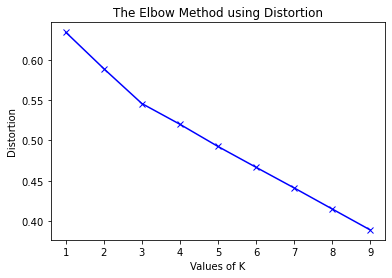

In [30]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

####  b) Using the different values of Inertia:

In [31]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 17.649150813605182
2 : 15.56099162895957
3 : 13.606154151001776
4 : 12.384590266377002
5 : 11.095559954267115
6 : 10.10785210603096
7 : 9.147823143037492
8 : 8.1594525525296
9 : 7.1748299771064294


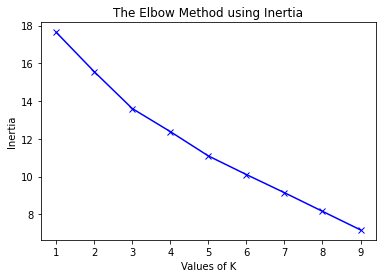

In [32]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [33]:
# from New York Data Set
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rosario_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

https://stats.stackexchange.com/questions/89679/what-do-you-do-when-theres-no-elbow-point-for-kmeans-clustering

Let's create a new dataframe that includes the cluster label as well as the top 10 venues for each neighborhood.

In [34]:
# add clustering labels to the df
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_, allow_duplicates=True)

rosario_merged = neighborhoods

# merge rosario_grouped with toronto_data to add latitude/longitude for each neighborhood
rosario_merged = rosario_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
rosario_merged

,Neighborhood,Latitude,Longitude,Districts,MarkerColor,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,14 de Octubre,-32.996944,-60.663056,Distrito Sudoeste,blue,0.0,Home Service,Construction & Landscaping,Massage Studio,Nutritionist,Pub,Pool,Plaza,Pizza Place,Pharmacy,Pet Store
1,17 de Agosto,-33.011944,-60.660000,Distrito Sudoeste,blue,0.0,Restaurant,Hotel,Pool,Dessert Shop,Casino,Public Art,Plaza,Pizza Place,Pharmacy,Pet Store
2,Abasto,-32.961667,-60.646944,Distrito Centro,red,0.0,Argentinian Restaurant,Plaza,Gastropub,Multiplex,Pool,Pizza Place,Pharmacy,Pet Store,Pedestrian Plaza,Nutritionist
3,Alberdi,-32.897222,-60.698333,Distrito Norte,green,0.0,Construction & Landscaping,Farmers Market,Nutritionist,Pub,Pool,Plaza,Pizza Place,Pharmacy,Pet Store,Pedestrian Plaza
4,Alberto Olmedo,-32.933611,-60.658056,Distrito Centro,red,0.0,Sushi Restaurant,Nightclub,Italian Restaurant,Hotel,Brewery,Restaurant,Mexican Restaurant,Argentinian Restaurant,Concert Hall,Cocktail Bar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Tiro Suizo,-32.997778,-60.652500,Distrito Sur,lightgreen,0.0,Construction & Landscaping,Sporting Goods Shop,Pizza Place,Ice Cream Shop,Video Game Store,Athletics & Sports,Irish Pub,Nightclub,Pool,Plaza
42,Triángulo y Moderno,-32.977500,-60.700000,Distrito Oeste,purple,0.0,Bakery,Accessories Store,Multiplex,Pool,Plaza,Pizza Place,Pharmacy,Pet Store,Pedestrian Plaza,Nutritionist
43,Victoria Walsh,-32.964722,-60.688889,Distrito Oeste,purple,0.0,Construction & Landscaping,Nightclub,Pub,Pool,Plaza,Pizza Place,Pharmacy,Pet Store,Pedestrian Plaza,Nutritionist
44,Villa Manuelita,-32.985278,-60.624444,Distrito Sur,lightgreen,0.0,Pizza Place,Bakery,Accessories Store,Multiplex,Pool,Plaza,Pharmacy,Pet Store,Pedestrian Plaza,Nutritionist


Before continuing with my analysis, let's check if there are any NaN values in this dataframe:

In [35]:
rosario_merged.isnull().values.any()

True

Are there any NaN values in the 'Cluster Labels' column?

In [36]:
rosario_merged['Cluster Labels'].isnull().sum()

7

Let's drop those NaN values from 'Cluster Labels':

In [37]:
rosario_merged = rosario_merged.dropna(subset=['Cluster Labels'])

In [38]:
# check the df new shape
rosario_merged.shape

(39, 16)

Finally, let's visualize the resulting clusters:

In [39]:
# Assign colors to the different Cluster Labels and replace with these new values the column named 'MarkerColor'
labels = list(rosario_merged['Cluster Labels'])

marker_color = []

for label in labels:
    if label == 0:
        marker_color.append('red')
    elif label == 1:
        marker_color.append('blue')

rosario_merged['MarkerColor'] = marker_color
rosario_merged.head()

/home/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Neighborhood,Latitude,Longitude,Districts,MarkerColor,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,14 de Octubre,-32.996944,-60.663056,Distrito Sudoeste,red,0.0,Home Service,Construction & Landscaping,Massage Studio,Nutritionist,Pub,Pool,Plaza,Pizza Place,Pharmacy,Pet Store
1,17 de Agosto,-33.011944,-60.660000,Distrito Sudoeste,red,0.0,Restaurant,Hotel,Pool,Dessert Shop,Casino,Public Art,Plaza,Pizza Place,Pharmacy,Pet Store
2,Abasto,-32.961667,-60.646944,Distrito Centro,red,0.0,Argentinian Restaurant,Plaza,Gastropub,Multiplex,Pool,Pizza Place,Pharmacy,Pet Store,Pedestrian Plaza,Nutritionist
3,Alberdi,-32.897222,-60.698333,Distrito Norte,red,0.0,Construction & Landscaping,Farmers Market,Nutritionist,Pub,Pool,Plaza,Pizza Place,Pharmacy,Pet Store,Pedestrian Plaza
4,Alberto Olmedo,-32.933611,-60.658056,Distrito Centro,red,0.0,Sushi Restaurant,Nightclub,Italian Restaurant,Hotel,Brewery,Restaurant,Mexican Restaurant,Argentinian Restaurant,Concert Hall,Cocktail Bar


In [40]:
# create map of Rosario showing clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district, neighborhood, markercolor in zip(rosario_merged['Latitude'], 
                                                        rosario_merged['Longitude'], 
                                                        rosario_merged['Districts'], 
                                                        rosario_merged['Neighborhood'],
                                                        rosario_merged['MarkerColor']
                                                       ):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)

map_clusters

The map clearly shows that in this dataset there is only one cluster. The shape of the elbow method line plot also indicated that this was a possibility.

The reason is probably that I included all neighborhoods in the analysis, even those for which there is little data available.

I went to college in Rosario and lived there for 15 years, so I know that for the purpose of this analysis I can exclude several neighborhoods that are peripheral areas of the city, and thus not so economically active nor atractive to real estate investors.

I will exclude all neighborhoods for which there are less than 5 venues in the dataset, and repeat the analysis.

In [41]:
rosario_venues_grouped[rosario_venues_grouped['Venue'] < 5]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,14 de Octubre,4,4,4,4,4,4
2,Abasto,4,4,4,4,4,4
3,Alberdi,2,2,2,2,2,2
5,Alvear,1,1,1,1,1,1
6,Antártida Argentina,2,2,2,2,2,2
...,...,...,...,...,...,...,...
33,Tango,1,1,1,1,1,1
35,Triángulo y Moderno,1,1,1,1,1,1
36,Victoria Walsh,1,1,1,1,1,1
37,Villa Manuelita,2,2,2,2,2,2


There are 26/31 __?????????__ rows to be excluded, let's see what's left once I create a subset with the remaining neighborhoods:

In [42]:
rosario_venues_grouped = rosario_venues_grouped[rosario_venues_grouped['Venue'] >= 5]

In [43]:
print(rosario_venues_grouped.shape)
rosario_venues_grouped = rosario_venues_grouped.reset_index(drop=True)
rosario_venues_grouped.sort_values('Venue', ascending=False)

(13, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,Rosario Centro,38,38,38,38,38,38
5,Las Malvinas,23,23,23,23,23,23
1,Alberto Olmedo,18,18,18,18,18,18
2,Domingo Faustino Sarmiento,14,14,14,14,14,14
8,Nuestra Sra. de Lourdes,11,11,11,11,11,11
...,...,...,...,...,...,...,...
3,España y Hospitales,5,5,5,5,5,5
6,Latinoamérica,5,5,5,5,5,5
7,Luis Agote,5,5,5,5,5,5
9,Presidente Roque Saenz Peña,5,5,5,5,5,5


In [44]:
rosario_venues_grouped['Neighborhood'].values

array(['17 de Agosto', 'Alberto Olmedo', 'Domingo Faustino Sarmiento',
       'España y Hospitales', 'Jorge Cura', 'Las Malvinas',
       'Latinoamérica', 'Luis Agote', 'Nuestra Sra. de Lourdes',
       'Presidente Roque Saenz Peña',
       'Remedios de Escalada de San Martín', 'Rosario Centro',
       'Tiro Suizo'], dtype=object)

rosario_venues_groupedI will repeat my analysis with these 9 neighborhoods.
Let's filter the rosario_venues dataframe to keep only the neighborhoods of interest:

In [48]:
rosario_venues_grouped

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,17 de Agosto,8,8,8,8,8,8
1,Alberto Olmedo,18,18,18,18,18,18
2,Domingo Faustino Sarmiento,14,14,14,14,14,14
3,España y Hospitales,5,5,5,5,5,5
4,Jorge Cura,6,6,6,6,6,6
...,...,...,...,...,...,...,...
8,Nuestra Sra. de Lourdes,11,11,11,11,11,11
9,Presidente Roque Saenz Peña,5,5,5,5,5,5
10,Remedios de Escalada de San Martín,5,5,5,5,5,5
11,Rosario Centro,38,38,38,38,38,38


In [45]:
# I need to create a boolean filter to keep the rows with these 9 neighborhoods
nine_neighborhoods = list(rosario_venues_grouped['Neighborhood'].values)

mask = []

for value in rosario_venues['Neighborhood'].values:
    if value in nine_neighborhoods:
        mask.append(value)
len(mask) # do I need this cell? @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

150

In [49]:
# create a subdataframe filtering out the data of all neighborhoods with less than 5 venues
# create filters
cond_1 = rosario_venues['Neighborhood'] == '17 de Agosto'
cond_2 = rosario_venues['Neighborhood'] == 'Alberto Olmedo'
cond_3 = rosario_venues['Neighborhood'] == 'Domingo Faustino Sarmiento'
cond_4 = rosario_venues['Neighborhood'] == 'España y Hospitales'
cond_5 = rosario_venues['Neighborhood'] == 'Jorge Cura'
cond_6 = rosario_venues['Neighborhood'] == 'Las Malvinas'
cond_7 = rosario_venues['Neighborhood'] == 'Nuestra Sra. de Lourdes'
cond_8 = rosario_venues['Neighborhood'] == 'Remedios de Escalada de San Martín'
cond_9 = rosario_venues['Neighborhood'] == 'Rosario Centro'
# create subset
rosario_venues_subset = rosario_venues[cond_1 | cond_2 | cond_3 | cond_4 | cond_5 | cond_6 | cond_7 | cond_8 | cond_9]
rosario_venues_subset

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,17 de Agosto,-33.011944,-60.660000,Le Gula,-33.010215,-60.662410,Restaurant
5,17 de Agosto,-33.011944,-60.660000,City Center Rosario,-33.010516,-60.662831,Casino
6,17 de Agosto,-33.011944,-60.660000,Pullman Rosario City Center,-33.009934,-60.662786,Hotel
7,17 de Agosto,-33.011944,-60.660000,Destinos. Bar y sabores del mundo,-33.010692,-60.661592,Restaurant
8,17 de Agosto,-33.011944,-60.660000,Pileta Hotel Casino Pullman City Center De Ros...,-33.010359,-60.662576,Pool
...,...,...,...,...,...,...,...
183,Rosario Centro,-32.946667,-60.636667,La Sede,-32.943865,-60.640023,Coffee Shop
184,Rosario Centro,-32.946667,-60.636667,Roberta Rosa de Fontana,-32.947477,-60.641250,Hotel
185,Rosario Centro,-32.946667,-60.636667,Palace Garden Shopping,-32.945502,-60.641762,Shopping Mall
186,Rosario Centro,-32.946667,-60.636667,Farmacia Rosario,-32.943646,-60.640511,Pharmacy


https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

Let's check how many venues were returned for each neighborhood:

In [52]:
rosario_venues_subset.groupby('Neighborhood').count().sort_values('Venue', ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Rosario Centro,38,38,38,38,38,38
Las Malvinas,23,23,23,23,23,23
Alberto Olmedo,18,18,18,18,18,18
Domingo Faustino Sarmiento,14,14,14,14,14,14
Nuestra Sra. de Lourdes,11,11,11,11,11,11
17 de Agosto,8,8,8,8,8,8
Jorge Cura,6,6,6,6,6,6
España y Hospitales,5,5,5,5,5,5
Remedios de Escalada de San Martín,5,5,5,5,5,5


Let's find out how many unique categories can be curated from all the returned venues:

In [54]:
print('There are {} uniques categories.'.format(len(rosario_venues_subset['Venue Category'].unique())))

There are 56 uniques categories.


In [55]:
# one hot encoding
rosario_subset_onehot = pd.get_dummies(rosario_venues_subset[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rosario_subset_onehot['Neighborhood'] = rosario_venues_subset['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [rosario_subset_onehot.columns[-1]] + list(rosario_subset_onehot.columns[:-1])
rosario_subset_onehot = rosario_subset_onehot[fixed_columns]

rosario_subset_onehot.head()

,Neighborhood,Accessories Store,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Store,Bookstore,Breakfast Spot,...,Shopping Plaza,Skate Park,Soccer Field,Sporting Goods Shop,Supermarket,Sushi Restaurant,Theater,Theme Park,Vegetarian / Vegan Restaurant,Wine Bar
4,17 de Agosto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,17 de Agosto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,17 de Agosto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,17 de Agosto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17 de Agosto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size:

In [56]:
rosario_subset_onehot.shape

(128, 57)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [57]:
# group by mean frequency
rosario_grouped = rosario_subset_onehot.groupby('Neighborhood').mean().reset_index()
rosario_grouped

,Neighborhood,Accessories Store,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Store,Bookstore,Breakfast Spot,...,Shopping Plaza,Skate Park,Soccer Field,Sporting Goods Shop,Supermarket,Sushi Restaurant,Theater,Theme Park,Vegetarian / Vegan Restaurant,Wine Bar
0,17 de Agosto,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Alberto Olmedo,0.0,0.055556,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.055556
2,Domingo Faustino Sarmiento,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,...,0.000000,0.0,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
3,España y Hospitales,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Jorge Cura,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Las Malvinas,0.0,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,...,0.000000,0.0,0.000000,0.043478,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000
6,Nuestra Sra. de Lourdes,0.0,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,...,0.000000,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Remedios de Escalada de San Martín,0.0,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Rosario Centro,0.0,0.026316,0.000000,0.000000,0.078947,0.026316,0.000000,0.026316,0.026316,...,0.052632,0.0,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.026316,0.000000


Let's confirm the new size

In [58]:
rosario_grouped.shape

(9, 57)

Let's print each neighborhood along with the top 5 most common venues >>> NOT AGAIN,RIGHT?

In [60]:
# Create a new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rosario_grouped['Neighborhood']

for ind in np.arange(rosario_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rosario_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,17 de Agosto,Restaurant,Hotel,Pool,Casino,Dessert Shop,Accessories Store,Nightclub,Pedestrian Plaza,Pet Store,Pharmacy
1,Alberto Olmedo,Sushi Restaurant,Italian Restaurant,Nightclub,Café,Restaurant,Mexican Restaurant,Argentinian Restaurant,Hotel,Concert Hall,Cocktail Bar
2,Domingo Faustino Sarmiento,Fast Food Restaurant,Multiplex,Shopping Mall,Pizza Place,Supermarket,Bookstore,Sporting Goods Shop,Electronics Store,Café,Ice Cream Shop
3,España y Hospitales,Accessories Store,Ice Cream Shop,Food & Drink Shop,Skate Park,Market,Public Art,Multiplex,Nightclub,Pedestrian Plaza,Pet Store
4,Jorge Cura,Ice Cream Shop,Hotel,Pet Store,Pharmacy,Farm,Plaza,Accessories Store,Record Shop,Nightclub,Pedestrian Plaza


### Cluster Neighborhoods

In [ ]:
# elbow method

In [61]:
# drop 'Neighborhood' column before clustering
rosario_grouped_clustering = rosario_grouped.drop('Neighborhood', 1)

In [62]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(rosario_grouped_clustering)
    kmeanModel.fit(rosario_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(rosario_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / rosario_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(rosario_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / rosario_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

Tabulating and Visualizing the results:
a) Using the different values of Distortion:

In [63]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.35839042764643964
2 : 0.2893652546616971
3 : 0.22849169460893273
4 : 0.18015361586172865
5 : 0.13306406932730086
6 : 0.0896540927109706
7 : 0.05420163757557025
8 : 0.026701921493655075
9 : 0.0


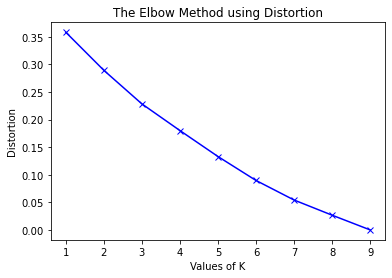

In [64]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

b) Using the different values of Inertia:

In [65]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1.255456130338839
2 : 0.9094755385929532
3 : 0.6350520384421232
4 : 0.4609263365207522
5 : 0.3011396299316128
6 : 0.16718455394534457
7 : 0.080465779198483
8 : 0.028876200763859414
9 : 0.0


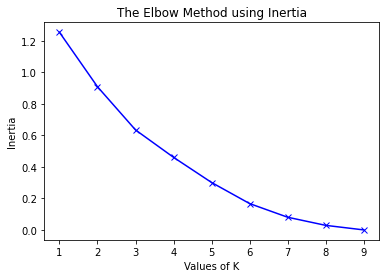

In [66]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [68]:
# from New York Data Set
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rosario_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head()

In [69]:
# add clustering labels to the df
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_, allow_duplicates=True)

rosario_merged = neighborhoods

# merge rosario_grouped with toronto_data to add latitude/longitude for each neighborhood
rosario_merged = rosario_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
rosario_merged

,Neighborhood,Latitude,Longitude,Districts,MarkerColor,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,14 de Octubre,-32.996944,-60.663056,Distrito Sudoeste,blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17 de Agosto,-33.011944,-60.660000,Distrito Sudoeste,blue,1.0,Restaurant,Hotel,Pool,Casino,Dessert Shop,Accessories Store,Nightclub,Pedestrian Plaza,Pet Store,Pharmacy
2,Abasto,-32.961667,-60.646944,Distrito Centro,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alberdi,-32.897222,-60.698333,Distrito Norte,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alberto Olmedo,-32.933611,-60.658056,Distrito Centro,red,0.0,Sushi Restaurant,Italian Restaurant,Nightclub,Café,Restaurant,Mexican Restaurant,Argentinian Restaurant,Hotel,Concert Hall,Cocktail Bar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Tiro Suizo,-32.997778,-60.652500,Distrito Sur,lightgreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Triángulo y Moderno,-32.977500,-60.700000,Distrito Oeste,purple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Victoria Walsh,-32.964722,-60.688889,Distrito Oeste,purple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Villa Manuelita,-32.985278,-60.624444,Distrito Sur,lightgreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
rosario_merged = rosario_merged.dropna()

In [73]:
rosario_merged

,Neighborhood,Latitude,Longitude,Districts,MarkerColor,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,17 de Agosto,-33.011944,-60.660000,Distrito Sudoeste,blue,1.0,Restaurant,Hotel,Pool,Casino,Dessert Shop,Accessories Store,Nightclub,Pedestrian Plaza,Pet Store,Pharmacy
4,Alberto Olmedo,-32.933611,-60.658056,Distrito Centro,red,0.0,Sushi Restaurant,Italian Restaurant,Nightclub,Café,Restaurant,Mexican Restaurant,Argentinian Restaurant,Hotel,Concert Hall,Cocktail Bar
12,Domingo Faustino Sarmiento,-32.910278,-60.686389,Distrito Norte,green,0.0,Fast Food Restaurant,Multiplex,Shopping Mall,Pizza Place,Supermarket,Bookstore,Sporting Goods Shop,Electronics Store,Café,Ice Cream Shop
14,España y Hospitales,-32.971389,-60.652222,Distrito Centro,red,0.0,Accessories Store,Ice Cream Shop,Food & Drink Shop,Skate Park,Market,Public Art,Multiplex,Nightclub,Pedestrian Plaza,Pet Store
19,Jorge Cura,-32.968333,-60.663333,Distrito Sudoeste,blue,0.0,Ice Cream Shop,Hotel,Pet Store,Pharmacy,Farm,Plaza,Accessories Store,Record Shop,Nightclub,Pedestrian Plaza
24,Las Malvinas,-32.924444,-60.670278,Distrito Norte,green,0.0,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Clothing Store,Shopping Mall,Café,Event Space,Electronics Store,Sandwich Place,Irish Pub
30,Nuestra Sra. de Lourdes,-32.948333,-60.660833,Distrito Centro,red,0.0,Italian Restaurant,Ice Cream Shop,Restaurant,Bakery,Breakfast Spot,Pizza Place,Soccer Field,Nightclub,Pedestrian Plaza,Pet Store
34,Remedios de Escalada de San Martín,-32.943611,-60.682500,Distrito Centro,red,2.0,Argentinian Restaurant,Ice Cream Shop,Restaurant,Theme Park,Theater,Mexican Restaurant,Multiplex,Vegetarian / Vegan Restaurant,Nightclub,Pedestrian Plaza
36,Rosario Centro,-32.946667,-60.636667,Distrito Centro,red,0.0,Café,Shopping Mall,Bakery,Hotel,Shopping Plaza,Coffee Shop,Sandwich Place,Seafood Restaurant,Indie Movie Theater,Diner


In [74]:
# Assign colors to the different Cluster Labels and replace with these new values the column named 'MarkerColor'
labels = list(rosario_merged['Cluster Labels'])

marker_color = []

for label in labels:
    if label == 0:
        marker_color.append('red')
    elif label == 1:
        marker_color.append('blue')
    elif label == 2:
        marker_color.append('green')

rosario_merged['MarkerColor'] = marker_color
rosario_merged.head()

/home/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Latitude,Longitude,Districts,MarkerColor,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,17 de Agosto,-33.011944,-60.660000,Distrito Sudoeste,blue,1.0,Restaurant,Hotel,Pool,Casino,Dessert Shop,Accessories Store,Nightclub,Pedestrian Plaza,Pet Store,Pharmacy
4,Alberto Olmedo,-32.933611,-60.658056,Distrito Centro,red,0.0,Sushi Restaurant,Italian Restaurant,Nightclub,Café,Restaurant,Mexican Restaurant,Argentinian Restaurant,Hotel,Concert Hall,Cocktail Bar
12,Domingo Faustino Sarmiento,-32.910278,-60.686389,Distrito Norte,red,0.0,Fast Food Restaurant,Multiplex,Shopping Mall,Pizza Place,Supermarket,Bookstore,Sporting Goods Shop,Electronics Store,Café,Ice Cream Shop
14,España y Hospitales,-32.971389,-60.652222,Distrito Centro,red,0.0,Accessories Store,Ice Cream Shop,Food & Drink Shop,Skate Park,Market,Public Art,Multiplex,Nightclub,Pedestrian Plaza,Pet Store
19,Jorge Cura,-32.968333,-60.663333,Distrito Sudoeste,red,0.0,Ice Cream Shop,Hotel,Pet Store,Pharmacy,Farm,Plaza,Accessories Store,Record Shop,Nightclub,Pedestrian Plaza


In [75]:
# create map of Rosario showing clusters
map_clusters_2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district, neighborhood, markercolor in zip(rosario_merged['Latitude'], 
                                                        rosario_merged['Longitude'], 
                                                        rosario_merged['Districts'], 
                                                        rosario_merged['Neighborhood'],
                                                        rosario_merged['MarkerColor']
                                                       ):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters_2)

map_clusters_2